In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv("https://filtereddatasets.s3.amazonaws.com/Groceries_retail/Groceriesv2.csv")
data.head(10)

,Order_no,Prod_no,Prod_name,Sale_date,Sale_time,No_of_units,Unit_price,Total_amt
0,OD_100034,15,Icecream Cone - Areo Chocolate,12/04/2017,13:40:41,3,$4.66,$13.98
1,OD_100034,21,Beer - Fruli,12/04/2017,13:40:41,10,$5.63,$56.30
2,OD_100034,121,Wine - Vidal Icewine Magnotta,12/04/2017,13:40:41,15,$4.29,$64.35
3,OD_100034,125,Veal - Inside,12/04/2017,13:40:41,17,$4.56,$77.52
4,OD_100034,156,Flour - Teff,12/04/2017,13:40:41,2,$5.50,$11.00
5,OD_100034,214,"Butter - Salted, Micro",12/04/2017,13:40:41,17,$3.44,$58.48
6,OD_100034,529,Dried Cranberries,12/04/2017,13:40:41,5,$9.93,$49.65
7,OD_100034,758,Flavouring Vanilla Artificial,12/04/2017,13:40:41,6,$5.01,$30.06
8,OD_100034,806,Cheese - Sheep Milk,12/04/2017,13:40:41,5,$8.20,$41.00
9,OD_100059,65,Olives - Kalamata,11/25/2017,08:53:30,17,$3.52,$59.84


In [3]:
# Obtaining the products that are bought together in each order

df = data
df = df.groupby(['Order_no', 'Prod_name'], as_index=False).agg({
    'No_of_units':'sum'})

In [4]:
df.head(10)

,Order_no,Prod_name,No_of_units
0,OD_100034,Beer - Fruli,10
1,OD_100034,"Butter - Salted, Micro",17
2,OD_100034,Cheese - Sheep Milk,5
3,OD_100034,Dried Cranberries,5
4,OD_100034,Flavouring Vanilla Artificial,6
5,OD_100034,Flour - Teff,2
6,OD_100034,Icecream Cone - Areo Chocolate,3
7,OD_100034,Veal - Inside,17
8,OD_100034,Wine - Vidal Icewine Magnotta,15
9,OD_100059,Kaffir Lime Leaves,11


In [5]:
# pivoting the products that are bought together in each order

basket = (df.groupby(['Order_no', 'Prod_name'])['No_of_units']
         .sum().unstack().reset_index().fillna(0)
         .set_index('Order_no'))
basket.head(10)

Prod_name,Alize Sunset,Amaretto,Amarula Cream,Anchovy In Oil,Anisette - Mcguiness,Appetizer - Assorted Box,Appetizer - Cheese Bites,Appetizer - Escargot Puff,"Appetizer - Mini Egg Roll, Shrimp",Appetizer - Sausage Rolls,...,Wine - White Cab Sauv.on,"Wine - White, French Cross","Wine - White, Mosel Gold",Wine La Vielle Ferme Cote Du,Yeast Dry - Fermipan,Yogurt - Assorted Pack,"Yogurt - Cherry, 175 Gr",Yogurt - Plain,Yukon Jack,"Zucchini - Mini, Green"
Order_no,,,,,,,,,,,,,,,,,,,,,
OD_100034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OD_100333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# encoding function

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [7]:
# encoding the items that are bought together in each order

basket1 = basket.applymap(encode_units)
basket1.head()

Prod_name,Alize Sunset,Amaretto,Amarula Cream,Anchovy In Oil,Anisette - Mcguiness,Appetizer - Assorted Box,Appetizer - Cheese Bites,Appetizer - Escargot Puff,"Appetizer - Mini Egg Roll, Shrimp",Appetizer - Sausage Rolls,...,Wine - White Cab Sauv.on,"Wine - White, French Cross","Wine - White, Mosel Gold",Wine La Vielle Ferme Cote Du,Yeast Dry - Fermipan,Yogurt - Assorted Pack,"Yogurt - Cherry, 175 Gr",Yogurt - Plain,Yukon Jack,"Zucchini - Mini, Green"
Order_no,,,,,,,,,,,,,,,,,,,,,
OD_100034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OD_100059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OD_100101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OD_100114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OD_100136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# implementing Apriori Algorithm and Association Rule Mining

freq_items = apriori(basket1, min_support = 0.01, use_colnames = True)
rules = association_rules(freq_items, metric = 'lift', min_threshold = 1)

In [9]:
# items purchased together in greatest number of orders

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Icecream - Dstk Cml And Fdg),(Icecream Cone - Areo Chocolate),0.027707,0.027283,0.018188,0.656455,24.061269,0.017433,2.831413
1,(Icecream Cone - Areo Chocolate),(Icecream - Dstk Cml And Fdg),0.027283,0.027707,0.018188,0.666667,24.061269,0.017433,2.916879


In [10]:
# getting the data of the frequently purchased items

freq_purchased = df.groupby(['Prod_name'])
freq_pur_fdg = freq_purchased.get_group('Icecream - Dstk Cml And Fdg')
freq_pur_areo = freq_purchased.get_group('Icecream Cone - Areo Chocolate')

In [11]:
# merging the frequently purchased items data based on order_no

freq_pur = pd.merge(freq_pur_fdg, freq_pur_areo, on = 'Order_no')

In [12]:
# final dataset of most frequently purchased items together

freq_pur

,Order_no,Prod_name_x,No_of_units_x,Prod_name_y,No_of_units_y
0,OD_109918,Icecream - Dstk Cml And Fdg,16,Icecream Cone - Areo Chocolate,10
1,OD_110921,Icecream - Dstk Cml And Fdg,8,Icecream Cone - Areo Chocolate,2
2,OD_111776,Icecream - Dstk Cml And Fdg,6,Icecream Cone - Areo Chocolate,2
3,OD_114868,Icecream - Dstk Cml And Fdg,14,Icecream Cone - Areo Chocolate,8
4,OD_119017,Icecream - Dstk Cml And Fdg,7,Icecream Cone - Areo Chocolate,3
5,OD_131446,Icecream - Dstk Cml And Fdg,8,Icecream Cone - Areo Chocolate,2
6,OD_136183,Icecream - Dstk Cml And Fdg,7,Icecream Cone - Areo Chocolate,1
7,OD_138008,Icecream - Dstk Cml And Fdg,11,Icecream Cone - Areo Chocolate,5
8,OD_138912,Icecream - Dstk Cml And Fdg,8,Icecream Cone - Areo Chocolate,4
9,OD_139182,Icecream - Dstk Cml And Fdg,12,Icecream Cone - Areo Chocolate,6


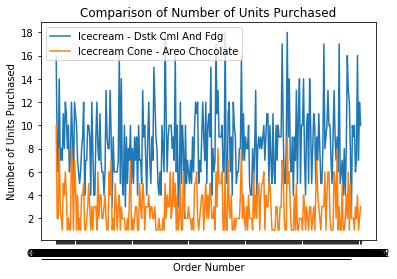

In [14]:
# identifying the purchasing relation between the most frequently purchased items together

import matplotlib.pyplot as plt

order_list = freq_pur['Order_no'].tolist()
fdg_list = freq_pur['No_of_units_x'].tolist()
areo_list = freq_pur['No_of_units_y'].tolist()

plt.plot(order_list, fdg_list, label = 'Icecream - Dstk Cml And Fdg')
plt.plot(order_list, areo_list, label = 'Icecream Cone - Areo Chocolate')

plt.xlabel('Order Number')
plt.ylabel('Number of Units Purchased')
plt.legend(loc = 'upper left')
plt.yticks([2,4,6,8,10,12,14,16,18])
plt.title('Comparison of Number of Units Purchased')
plt.show()